<a href="https://colab.research.google.com/github/MuraseH/Test-2/blob/test2/%E9%AD%9AAI%E3%83%A2%E3%83%87%E3%83%AB%E9%96%8B%E7%99%BA_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# read meファイルにライブラリのverを書く

In [ ]:
# githubとの連携　issue駆動開発

In [ ]:
# 制限時間切れランタイム切断　対策

In [ ]:
# 魚じゃないものが送られてきたときどうするか

# **GitHub連携**

In [ ]:
# yoloを接続
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.69 MiB | 27.51 MiB/s, done.
Resolving deltas: 100% (11718/11718), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 23.0 MB/s eta 0:00:00


In [ ]:
#必要なパッケージのインストール
!pip install torch torchvision matplotlib opencv-python

In [ ]:
#ドライブと接続
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#学習の実施
%cd /content/yolov5
%env WANDB_DISABLED=true
!python train.py --imgsz 640 --batch 20 --epochs 20 --data '/content/drive/Shareddrives/2024-SOFT3-GW-09/AIモデル関連/画像・データセット関連/白点病/金魚/setting.yaml' --name fish_disease

/content/yolov5
env: WANDB_DISABLED=true
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-04 02:01:29.555936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-04 02:01:29.575264: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-04 02:01:29.581273: E external/local_xla/xla/stream_execut

In [ ]:
# 学習済みモデルをローカルにダウンロード
from google.colab import files
files.download('runs/train/fish_disease/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

モデルをロード中...


/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-12-4 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/c

物体検出を実行中...


WARNING ⚠️ NMS time limit 0.550s exceeded
Saved 1 image to runs/detect/exp


検出結果を保存中: runs/detect/exp
検出結果を表示中...


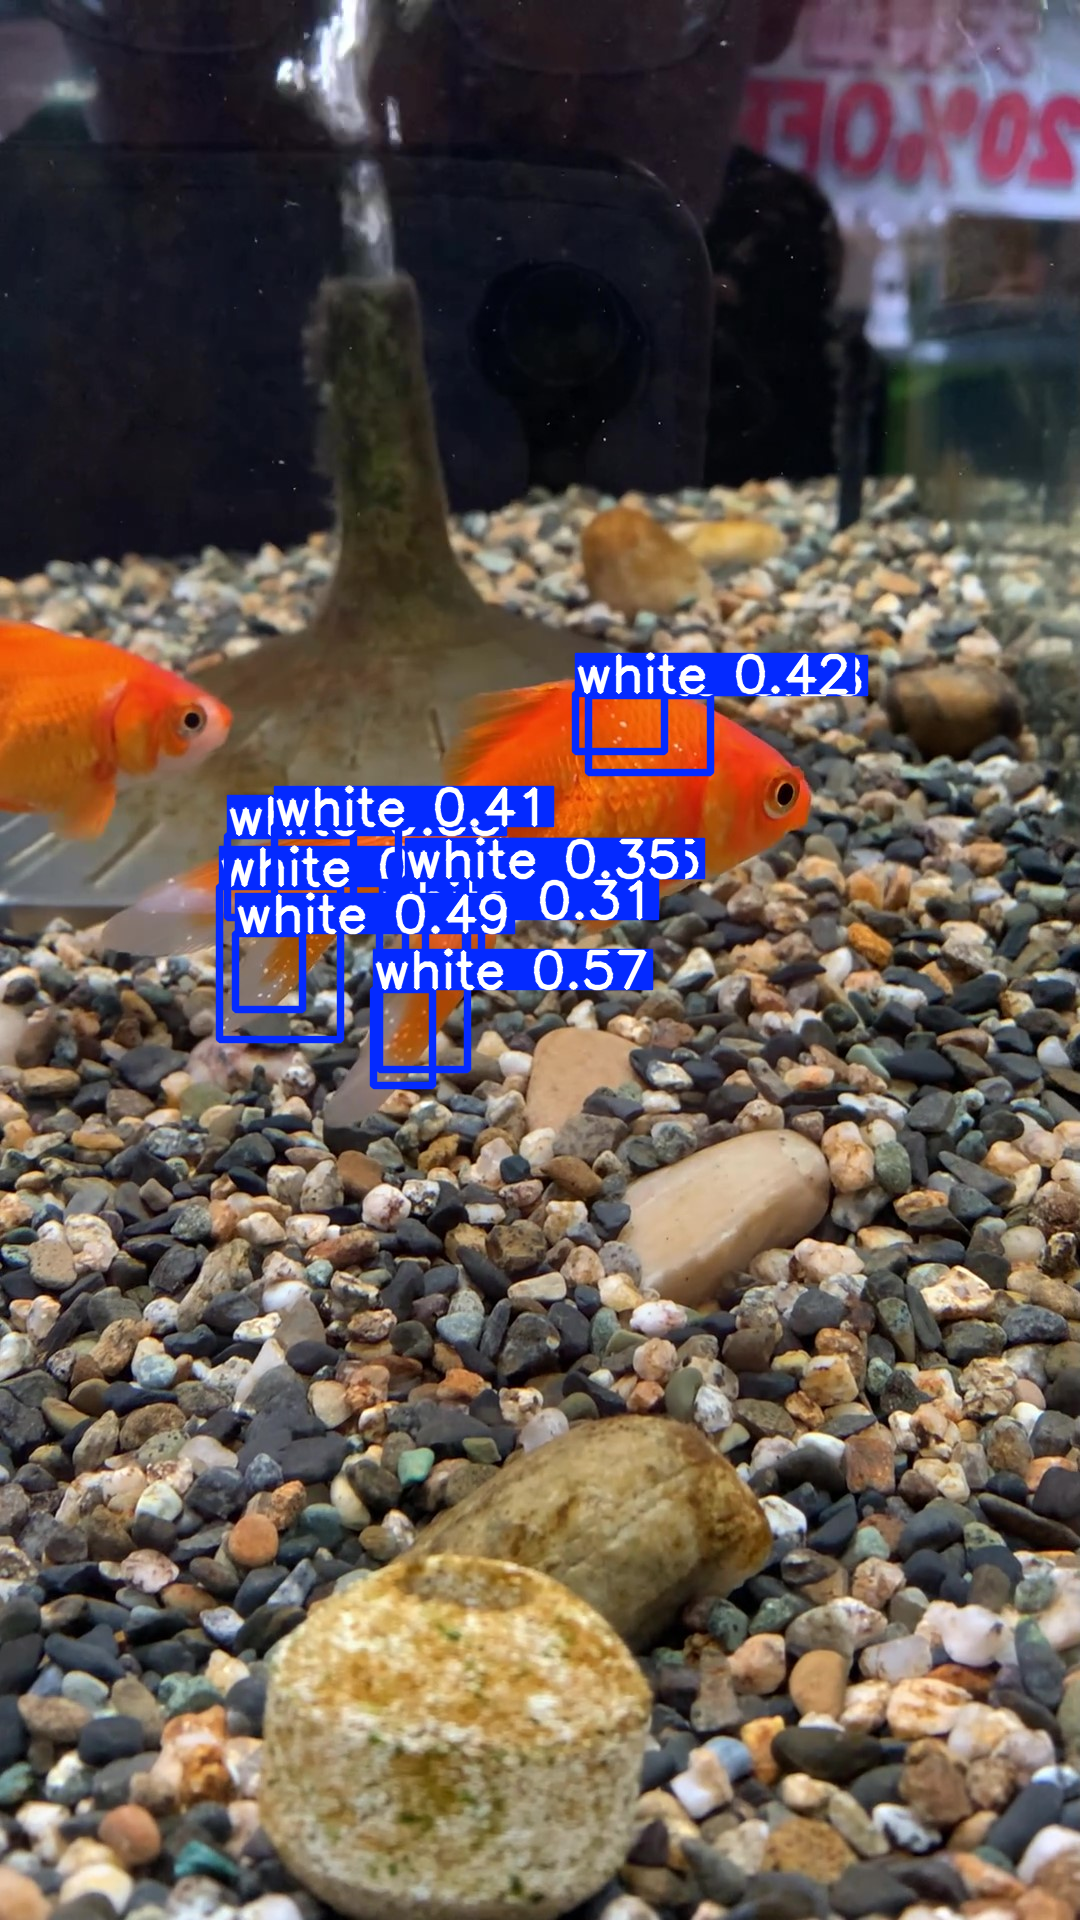

In [ ]:
import torch
from pathlib import Path

# 学習済みモデルのパスを指定
model_path = '/content/drive/Shareddrives/2024-SOFT3-GW-09/AIモデル関連/画像・データセット関連/白点病/金魚/best.pt'

# 検出対象の画像を保存しているフォルダ（または単一画像ファイル）
input_images = '/content/drive/Shareddrives/2024-SOFT3-GW-09/AIモデル関連/画像・データセット関連/白点病/金魚/white_goldfish(137).jpg'  # フォルダまたは画像ファイル

# 検出結果を保存するディレクトリ
output_dir = 'runs/detect/exp'

# YOLOv5モデルをロード
print("モデルをロード中...")
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True)

# 検出を実行
print("物体検出を実行中...")
results = model(input_images)

# 検出結果を保存
print(f"検出結果を保存中: {output_dir}")
results.save(output_dir)

# 検出結果を表示
print("検出結果を表示中...")
results.show()
